# spark_env 가상환경에서의 빅데이터 
# 역할분담으로 인한 시간 절약 

In [63]:
import numpy as np
import time

In [64]:
sc= SparkContext.getOrCreate()   #스파크 이용 하겠다. 

In [65]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [66]:
MAX = 100000

In [67]:
rdd = sc.parallelize([i for i in range(3, MAX+1)],10)
# rdd는 스파크의 인메모리 환경.   # 뒤에 숫자10은 나누어줄 갯수

In [68]:
def get_prime(num):
    isPrime = True
    for index in range(2, num):
        if num% index ==0:
            isPrime == False
            break
            
    if isPrime == True:
        return num

In [69]:
start = time.time()
prime_list = rdd.map(get_prime).collect()  #결과 값을 다 모으는 함수 
end = time.time()
print("소요시간=", end-start)

소요시간= 14.533770561218262


In [70]:
prime_list

[3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,


In [71]:
from pyspark.mllib.tree import DecisionTree, DecisionTreeModel

In [72]:
df = spark.read.csv( "playtennis.csv", header=True)

In [73]:
type(df)

pyspark.sql.dataframe.DataFrame

In [74]:
df.show()

+--------+-----------+--------+------+----------+
| Outlook|Temperature|Humidity|  Wind|PlayTennis|
+--------+-----------+--------+------+----------+
|   Sunny|        Hot|    High|  Weak|        No|
|   Sunny|        Hot|    High|Strong|        No|
|Overcast|        Hot|    High|  Weak|       Yes|
|    Rain|       Mild|    High|  Weak|       Yes|
|    Rain|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Cool|  Normal|Strong|        No|
|Overcast|       Cool|  Normal|Strong|       Yes|
|   Sunny|       Mild|    High|  Weak|        No|
|   Sunny|       Cool|  Normal|  Weak|       Yes|
|    Rain|       Mild|  Normal|  Weak|       Yes|
|   Sunny|       Mild|  Normal|Strong|       Yes|
|Overcast|       Mild|    High|Strong|       Yes|
|Overcast|        Hot|  Normal|  Weak|       Yes|
|    Rain|       Mild|    High|Strong|        No|
+--------+-----------+--------+------+----------+



In [75]:
from pyspark.sql import functions as F

In [76]:
# df.withColumn : 컬럼 데이터를 수정해서 리턴
# df.withColun("Outlook", "F.when(F.col("Outlook")=="Sunny",0))
# Outlook 컬럼의 값이 Sunny이면 0으로 수정해서 리턴
# otherwise(F.col("Outlook")) : 조건이 거짓이면 Outlook 컬럼의 기존 값 리턴
df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Sunny", 0).otherwise(F.col("Outlook")))
df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Overcast",1).otherwise(F.col("Outlook")))
df = df.withColumn("Outlook", F.when(F.col("Outlook")=="Rain",2).otherwise(F.col("Outlook")))

df = df.withColumn("Temperature", F.when(F.col("Temperature")=="Hot",0).otherwise(F.col("Temperature")))
df = df.withColumn("Temperature", F.when(F.col("Temperature")=="Mild",1).otherwise(F.col("Temperature")))
df = df.withColumn("Temperature", F.when(F.col("Temperature")=="Cool",2).otherwise(F.col("Temperature")))

df = df.withColumn("Humidity", F.when(F.col("Humidity")=="High",0).otherwise(F.col("Humidity")))
df = df.withColumn("Humidity", F.when(F.col("Humidity")=="Normal",1).otherwise(F.col("Humidity")))

df = df.withColumn("Wind", F.when(F.col("Wind")=="Weak",0).otherwise(F.col("Wind")))
df = df.withColumn("Wind", F.when(F.col("Wind")=="Strong",1).otherwise(F.col("Wind")))

df = df.withColumn("PlayTennis", F.when(F.col("PlayTennis")=="No",0).otherwise(F.col("PlayTennis")))
df = df.withColumn("PlayTennis", F.when(F.col("PlayTennis")=="Yes",1).otherwise(F.col("PlayTennis")))



# 위에 처럼 각각 지정해주는 방법과, spark 에서보다, Pandas에서 일괄 처리해주고, 다시 spark 변환해주는 것이 시간효율성을 높일수 있다.

In [77]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



In [78]:
df.schema          # 컬럼 명, 타입 을 조회하는 함수

StructType(List(StructField(Outlook,StringType,true),StructField(Temperature,StringType,true),StructField(Humidity,StringType,true),StructField(Wind,StringType,true),StructField(PlayTennis,StringType,true)))

# 밑의 과정은, 값 타입을 변경해주는 것이며, 판다스에서도 동일한 과정을 거처야한다.(시간은 같음)

In [79]:
df= df.withColumn("Outlook", df["Outlook"].cast('int'))

# withColumn이라는 것은 각 블록을 돌아다니며 새것으로 덮어 씌우는 것으로 이해하면 된다.

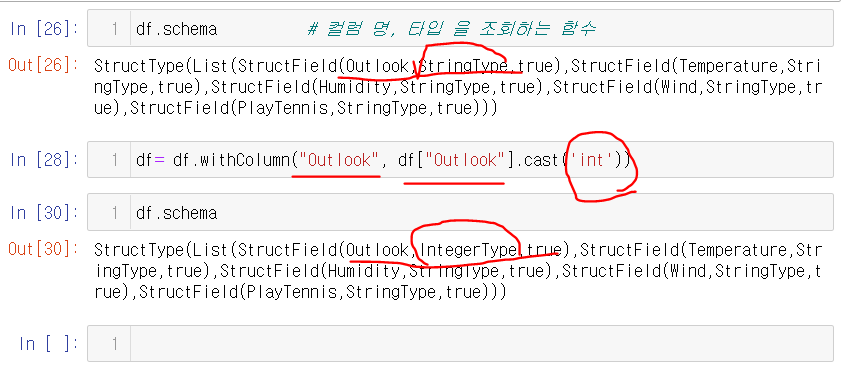

In [80]:
df = df.withColumn("Temperature", df["Temperature"].cast('int'))
df = df.withColumn("Humidity", df["Humidity"].cast('int'))
df = df.withColumn("Wind", df["Wind"].cast('int'))
df = df.withColumn("PlayTennis", df["PlayTennis"].cast('int'))

In [81]:
df.show()

+-------+-----------+--------+----+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|
+-------+-----------+--------+----+----------+
|      0|          0|       0|   0|         0|
|      0|          0|       0|   1|         0|
|      1|          0|       0|   0|         1|
|      2|          1|       0|   0|         1|
|      2|          2|       1|   0|         1|
|      2|          2|       1|   1|         0|
|      1|          2|       1|   1|         1|
|      0|          1|       0|   0|         0|
|      0|          2|       1|   0|         1|
|      2|          1|       1|   0|         1|
|      0|          1|       1|   1|         1|
|      1|          1|       0|   1|         1|
|      1|          0|       1|   0|         1|
|      2|          1|       0|   1|         0|
+-------+-----------+--------+----+----------+



# 위에까지의 과정은, 문자를 숫자로, 숫자(str) 타입을 int로 변경해주는 과정이었다

# 이제부터는, spark를 이용한 Decision Tree를 만들어보자

In [82]:
from pyspark.ml.feature import VectorAssembler

In [83]:
assembler = VectorAssembler(inputCols=["Outlook", "Temperature", "Humidity", "Wind"], outputCol="features")

In [84]:
assembler_df = assembler.transform(df)  # assembler의 features 은 위의 inputCols의 컬럼값을 합쳐서 생성됨,

In [85]:
assembler_df.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      1|          0|    

# 여기에서 부터, 데이터를 분리하는 작업

In [86]:
(trainingData, testData) = assembler_df.randomSplit([0.7, 0.3])

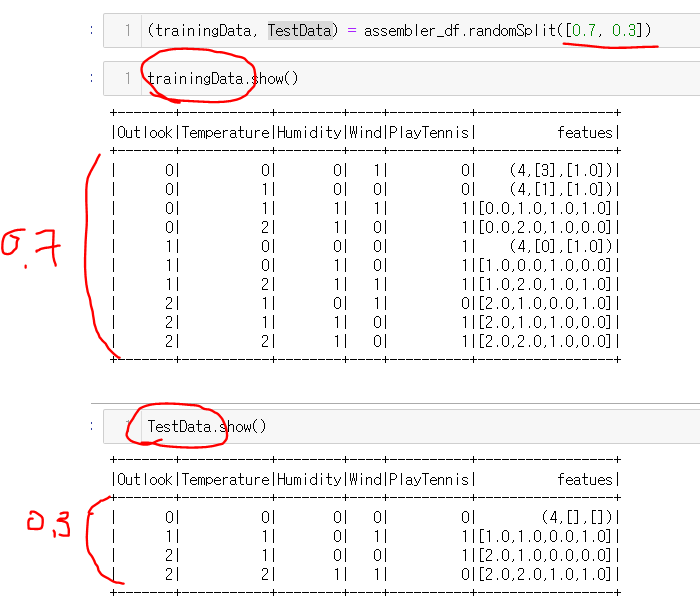

 # Classifier

In [87]:
from pyspark.ml.classification import DecisionTreeClassifier

In [88]:
dt= DecisionTreeClassifier(featuresCol= "features", labelCol = "PlayTennis")

In [89]:
dtModel= dt.fit(trainingData)
dtModel

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_8400ce549047) of depth 3 with 9 nodes

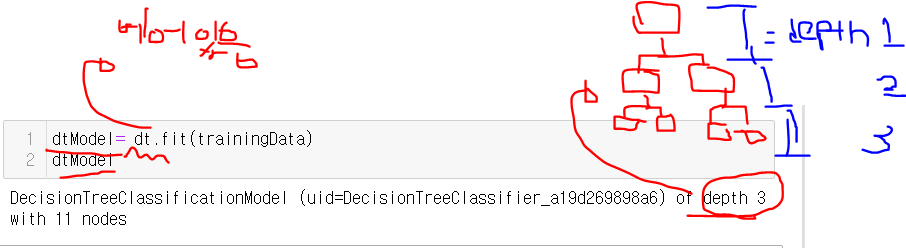

In [90]:
prediction= dtModel.transform(testData)

In [91]:
prediction.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      0|          1|       1|   1|         1|[0.0,1.0,1.0,1.0]|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|    [0.0,3.0]|  [0.0,1.0]|       1.0|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
+-------+-----------+--------+----+----------+-----------------+-------------+----

In [92]:
right_predict =prediction.filter(prediction.PlayTennis == prediction.prediction)

In [93]:
right_predict.show()

+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|rawPrediction|probability|prediction|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+
|      0|          0|       0|   1|         0|    (4,[3],[1.0])|    [2.0,0.0]|  [1.0,0.0]|       0.0|
|      1|          2|       1|   1|         1|[1.0,2.0,1.0,1.0]|    [0.0,3.0]|  [0.0,1.0]|       1.0|
|      2|          1|       0|   0|         1|[2.0,1.0,0.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
|      2|          1|       0|   1|         0|[2.0,1.0,0.0,1.0]|    [1.0,0.0]|  [1.0,0.0]|       0.0|
|      2|          1|       1|   0|         1|[2.0,1.0,1.0,0.0]|    [0.0,1.0]|  [0.0,1.0]|       1.0|
+-------+-----------+--------+----+----------+-----------------+-------------+-----------+----------+



In [94]:
a=right_predict.count()
b=prediction.count()
print(a, b)

5 6


In [95]:
# 정확도 계산 = right_predict.count() / prediction.count() 
# 위에서 각각 a,b로 변수 지정해주었으니 계산은 a/b
print("정확도=", a/b)

정확도= 0.8333333333333334


# 시각화 하기

In [96]:
from dtreeviz import trees

In [97]:
from dtreeviz.models.spark_decision_tree import ShadowSparkTree

In [98]:
# 독립변수를 조회 하기 
trainingData["Outlook","Temperature","Humidity","Wind"].show()

+-------+-----------+--------+----+
|Outlook|Temperature|Humidity|Wind|
+-------+-----------+--------+----+
|      0|          0|       0|   0|
|      0|          1|       0|   0|
|      0|          2|       1|   0|
|      1|          0|       0|   0|
|      1|          0|       1|   0|
|      1|          1|       0|   1|
|      2|          2|       1|   0|
|      2|          2|       1|   1|
+-------+-----------+--------+----+



위에 다중선택은 대괄호가 1개, 밑에 1개 선택은 대괄호가 2개 인 이유는 무엇?

위의 같은 경우 다중으로, 프레임이 만들어지는 경우이지만, 
1개인 경우 내용만 출력되기 때문에 괄호를 쓰여주여한다. 
[[]]2개인것은 데이터 프레임 .

In [99]:
trainingData[["PlayTennis"]].show() 

+----------+
|PlayTennis|
+----------+
|         0|
|         0|
|         1|
|         1|
|         1|
|         1|
|         1|
|         0|
+----------+



위에서 만든 dtModel 의 내요을 조회하는 부분으로, 어떻게 분류가 되었는지 알 수 있는 
부분이다. 

In [100]:
print(dtModel.toDebugString)   # depth는 3인걸 위에서 먼저 확인 할 수 있었다.

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_8400ce549047) of depth 3 with 9 nodes
  If (feature 0 <= 0.5)
   If (feature 1 <= 1.5)
    Predict: 0.0
   Else (feature 1 > 1.5)
    Predict: 1.0
  Else (feature 0 > 0.5)
   If (feature 0 <= 1.5)
    Predict: 1.0
   Else (feature 0 > 1.5)
    If (feature 3 <= 0.5)
     Predict: 1.0
    Else (feature 3 > 0.5)
     Predict: 0.0



In [101]:
trainingData.show()

+-------+-----------+--------+----+----------+-----------------+
|Outlook|Temperature|Humidity|Wind|PlayTennis|         features|
+-------+-----------+--------+----+----------+-----------------+
|      0|          0|       0|   0|         0|        (4,[],[])|
|      0|          1|       0|   0|         0|    (4,[1],[1.0])|
|      0|          2|       1|   0|         1|[0.0,2.0,1.0,0.0]|
|      1|          0|       0|   0|         1|    (4,[0],[1.0])|
|      1|          0|       1|   0|         1|[1.0,0.0,1.0,0.0]|
|      1|          1|       0|   1|         1|[1.0,1.0,0.0,1.0]|
|      2|          2|       1|   0|         1|[2.0,2.0,1.0,0.0]|
|      2|          2|       1|   1|         0|[2.0,2.0,1.0,1.0]|
+-------+-----------+--------+----+----------+-----------------+



In [102]:
dataset=trainingData.toPandas()  # 여러개로 분산되어 있는 것을 하나로 모으기 위해
                                #pandas로 프레임 만들어주기. 
dataset

,Outlook,Temperature,Humidity,Wind,PlayTennis,features
0,0,0,0,0,0,"(0.0, 0.0, 0.0, 0.0)"
1,0,1,0,0,0,"(0.0, 1.0, 0.0, 0.0)"
2,0,2,1,0,1,"[0.0, 2.0, 1.0, 0.0]"
3,1,0,0,0,1,"(1.0, 0.0, 0.0, 0.0)"
4,1,0,1,0,1,"[1.0, 0.0, 1.0, 0.0]"
5,1,1,0,1,1,"[1.0, 1.0, 0.0, 1.0]"
6,2,2,1,0,1,"[2.0, 2.0, 1.0, 0.0]"
7,2,2,1,1,0,"[2.0, 2.0, 1.0, 1.0]"


In [103]:
dataset[["Outlook","Temperature","Humidity","Wind", "PlayTennis"]]

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,0,0,0,0
1,0,1,0,0,0
2,0,2,1,0,1
3,1,0,0,0,1
4,1,0,1,0,1
5,1,1,0,1,1
6,2,2,1,0,1
7,2,2,1,1,0


 Spark Decision Tree 시각화 할 객체 = shadowSparkTree

In [104]:
spark_dtree = ShadowSparkTree (
                                dtModel,
                                dataset[["Outlook","Temperature","Humidity","Wind"]],
                                dataset["PlayTennis"],
                                feature_names=["Outlook","Temperature","Humidity","Wind"],
                                target_name="PlayTennis",
                                class_names=["No","Yes"]
)

In [105]:
spark_dtree

In [106]:
import os

In [107]:
os.environ["PATH"]+=os.pathsep + "c:/Program Files/Graphviz/bin"

In [108]:
os.environ["PATH"]

'C:\\Users\\Admin\\anaconda3\\envs\\spark_env;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\mingw-w64\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\usr\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Library\\bin;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\Scripts;C:\\Users\\Admin\\anaconda3\\envs\\spark_env\\bin;C:\\Users\\Admin\\anaconda3\\condabin;C:\\Data\\spark\\bin;C:\\Program Files\\Razer Chroma SDK\\bin;C:\\Program Files (x86)\\Razer\\ChromaBroadcast\\bin;C:\\Program Files\\Razer\\ChromaBroadcast\\bin;C:\\Program Files\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Common Files\\Oracle\\Java\\javapath;C:\\Program Files (x86)\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Program Files\\Intel\\Intel(R) Management Engine Components\\iCLS;C:\\Windows\\system32;C:\\Windows;C:\\Windows\\System32\\Wbem;C:\\Windows\\System32\\WindowsPowerShell\\v1.0;C:\\Windows\\System32\\OpenSSH;C:\\Program Files\\Intel\\WiFi\\bin;C:\\Program Files

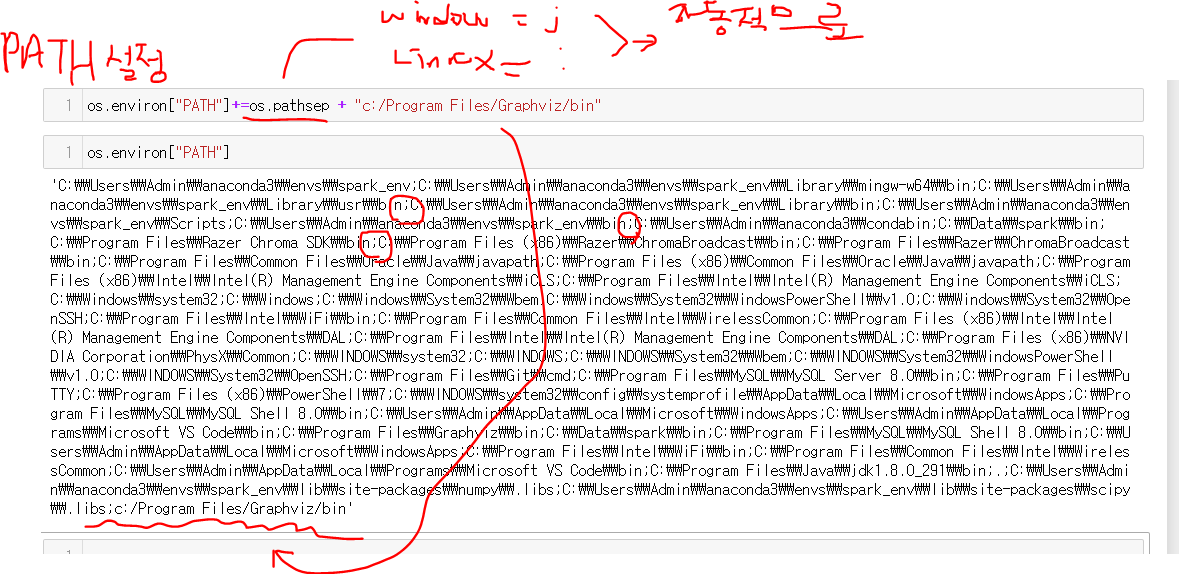

# Decision 내용 시각화

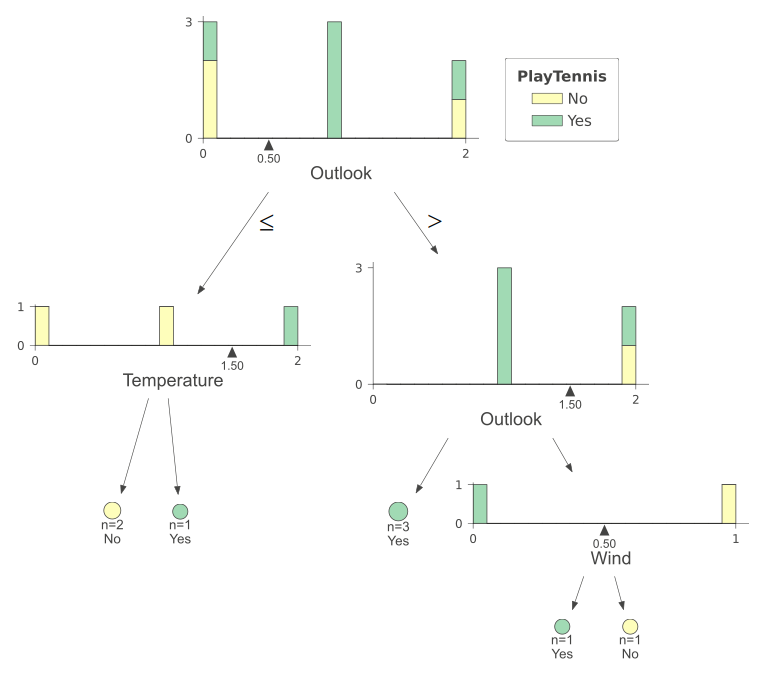

In [109]:
trees.dtreeviz(spark_dtree, scale=2.0)

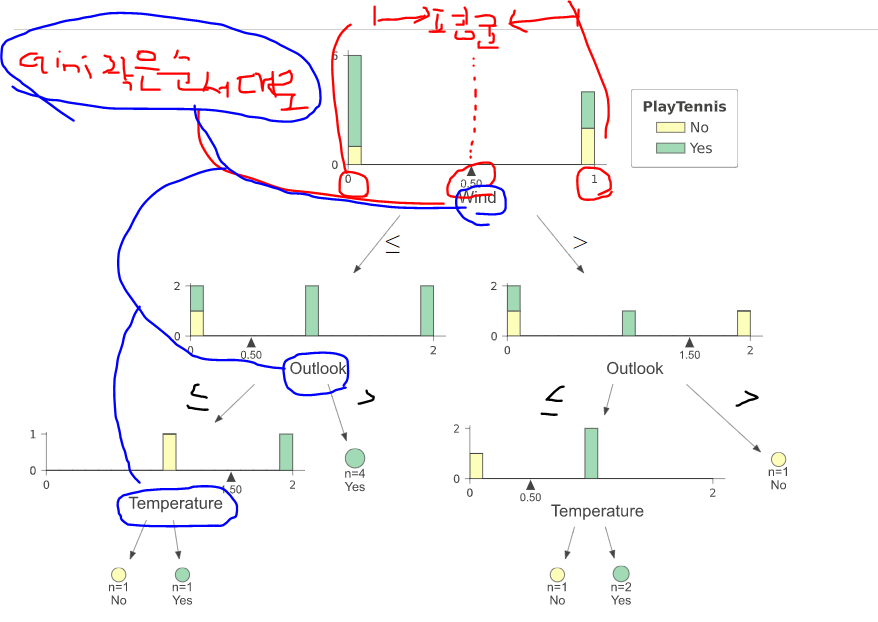

위의 그랴프레 대해서 설명, 가장 위쪽에 배치된 조건문이, 지니 지수가 가장 작은 순서대로 진앵되며, 각 값들의 평균값을 구해서 
해당된다면 다른 조건으로 넘어가서 진행을 한다. 


# 지니 지수 

데이터 집합의 불순도를 측정

지니지수는 0~1 사이의 값을 가지고있고, 집합체들이 순수할 수록 0에 가까움


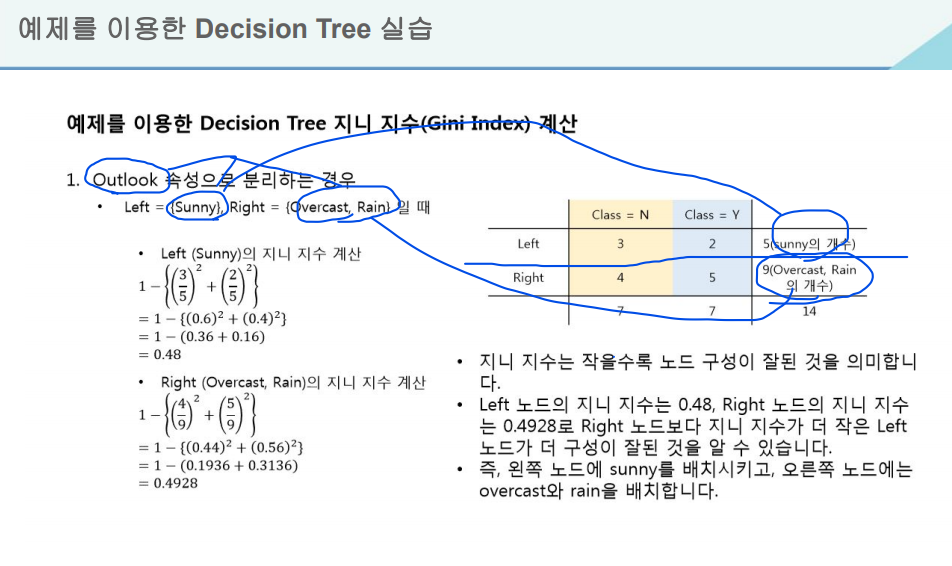

처음 나누어지는 트리에서 각각의 값을 분리하여 경우의 수에따라 가지치기 한후,
지수 를 계산하여 가장 작은 것을 체택하는 방법으로 ,
각각의 트리에서 생성된다

# 랜덤포레스트

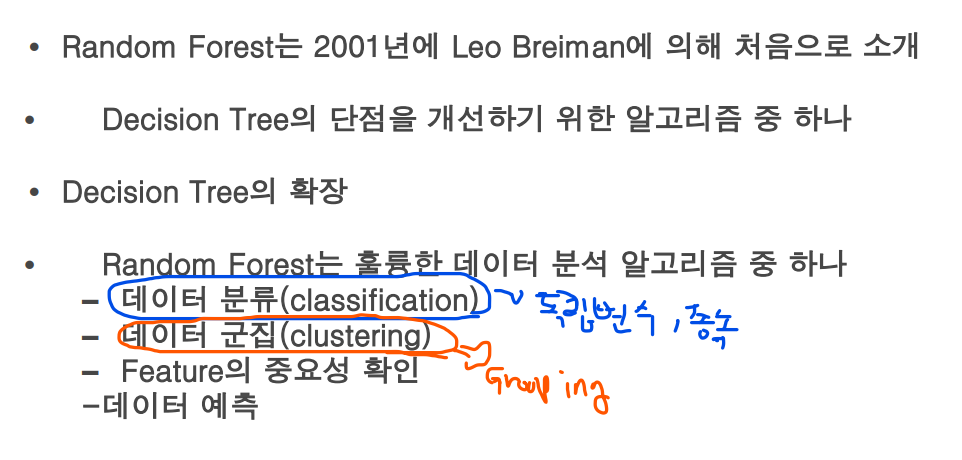